# Dummy-Variable

We replace a categorical data with the values 0 and 1.

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython import display

In [2]:
data = pd.read_csv(
"data/adult.data", header = None, index_col = False,
names= ['age','workclass','fnlwgt','education','education-num','a','occupation','f','g','gender','v','c',
        'hours-per-week','b','y'])

FileNotFoundError: [Errno 2] No such file or directory: 'data/adult.data'

In [3]:
pd.get_dummies(data)

NameError: name 'data' is not defined

# Binning

Text(0.5, 0, 'Feature')

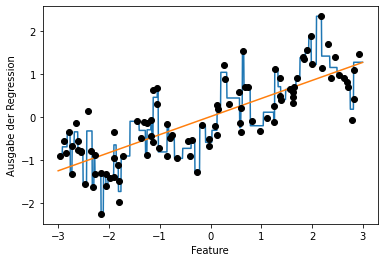

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X,y)
plt.plot(line, reg.predict(line), label = "Decision Tree")

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label = "linear Regression")

plt.plot(X[:,0], y, 'o', c = 'k')
plt.ylabel("Ausgabe der Regression")
plt.xlabel("Feature")

In [11]:
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [14]:
which_bin = np.digitize(X,bins=bins)
which_bin

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2],
       [ 2],
       [ 1],
       [ 9],
       [ 7],
       [ 8],
       [ 1],
       [10],
       [ 9],
       [ 3],
       [ 2],
       [ 2],
       [ 4],
       [ 6],
       [ 5],
       [ 3],
       [ 7],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 8],
       [ 2],
       [ 6],
       [ 6],
       [ 1],
       [ 7],
       [ 2],
       [ 1],
       [10],
       [10],
       [ 9],
       [ 4],
       [ 1],
       [ 7],
       [ 5],
       [ 2],
       [ 5],
       [ 1],
       [10],
       [ 3],
       [ 7],
       [ 4],
       [ 6],
       [ 6],
       [ 2],
       [10],
       [ 8],
       [10],
       [ 9],
       [ 6],
       [10],
       [ 1],
       [ 2],
       [ 1],
       [ 4],
       [ 4],
       [ 3],
       [ 9],
       [ 4],
       [ 3],
       [ 6],
       [ 2],
       [ 9],
       [ 1],
       [10],
       [ 8],
       [ 2],
       [ 1],
       [ 9],
       [ 8],
       [ 8],
       [ 8],

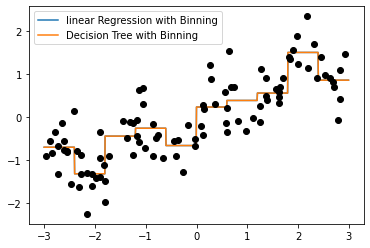

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)

line_binned = encoder.transform(np.digitize(line, bins = bins))
reg = LinearRegression().fit(X_binned, y)

plt.plot(line, reg.predict(line_binned), label='linear Regression with Binning')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)

plt.plot(line, reg.predict(line_binned), label='Decision Tree with Binning')
plt.plot(X[:,0],y,'o',c='k')
plt.legend(loc="best")

# Interaction & Polynomials

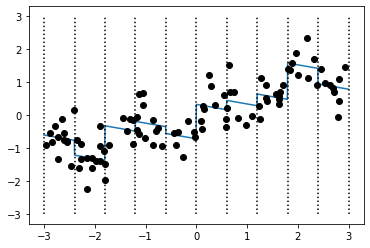

In [22]:
X_combined = np.hstack([X,X_binned])

reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = 'combined linear Regression')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
    
plt.plot(X[:,0],y,'o',c='k')    

The slope is in each bin the same. This does not make a lot of sense. Therefore, we try to get separate slopes.

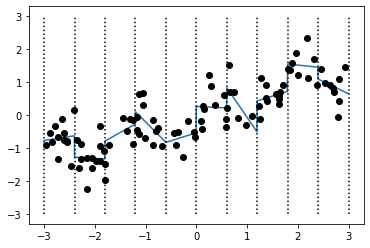

In [25]:
X_product = np.hstack([X_binned,X*X_binned])

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label = 'linear Regression as product')

for bin in bins:
    plt.plot([bin,bin],[-3,3],':',c='k')
    
plt.plot(X[:,0],y,'o',c='k')    

We can include polynomials of the features.

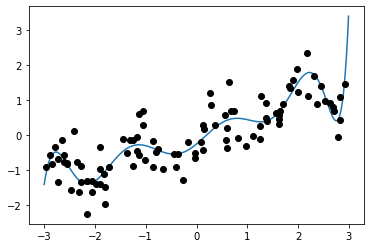

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = 'polynomial linear regression')
    
plt.plot(X[:,0],y,'o',c='k')    

# Non-linear Transformation

<BarContainer object of 141 artists>

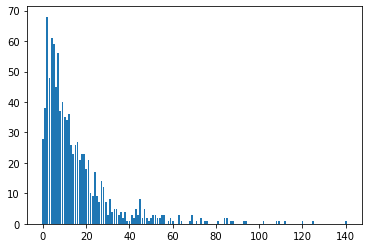

In [31]:
rnd = np.random.RandomState(0)

X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X=rnd.poisson(10*np.exp(X_org))
y=np.dot(X_org,w)

bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins)

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

Ridge().fit(X_train,y_train).score(X_test,y_test)

0.6224186236310758

In [36]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)

0.8749342372887815